<a href="https://www.kaggle.com/code/mosesmoncy/imdb-movie-reviews-sentiment-analysis?scriptVersionId=131347426" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In the age of digital media, movie reviews play a vital role in influencing viewers' choices. IMDb, one of the most popular online platforms for movie enthusiasts, hosts a vast collection of user-generated reviews. Extracting valuable insights from this massive corpus of reviews can be a daunting task. However, by leveraging the power of machine learning and natural language processing (NLP), we can unlock sentiment analysis, allowing us to analyze the overall sentiment behind IMDb movie reviews. In this article, we will delve into the techniques and methodologies used for sentiment analysis on IMDb movie reviews.

Model is created to predict the sentiment wheather it is 'positive' or 'negative' using Natural Processing Language (NLP).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re  

In [2]:
a=pd.read_csv('/kaggle/input/imdb-movie-review-dataset/IMDB Dataset.csv',encoding='ISO-8859-1')

In [3]:
a

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
a.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
a.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [6]:
a.shape

(50000, 2)

In [7]:
a.dtypes

review       object
sentiment    object
dtype: object

In [8]:
a.isna().sum()

review       0
sentiment    0
dtype: int64

positive    25000
negative    25000
Name: sentiment, dtype: int64

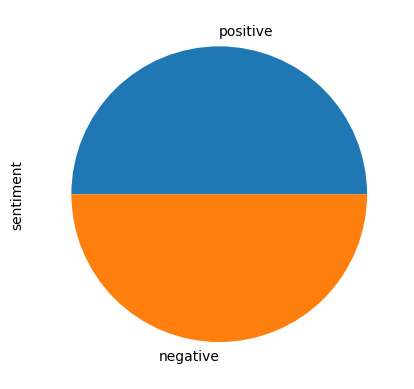

In [9]:
a['sentiment'].value_counts().plot(kind='pie')
a['sentiment'].value_counts()

In [10]:
# dropping irrelevant rows from 'target'

a.drop(a.index[(a['sentiment']=='Irrelevant')],axis=0,inplace=True)
a

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Hence No irrelevant data

In [11]:
# replacing Positive=1','Negative=-1'

a['sentiment']=a['sentiment'].replace('positive','1')
a['sentiment']=a['sentiment'].replace('negative','-1')

In [12]:
a.isna().sum()

review       0
sentiment    0
dtype: int64

In [13]:
a['sentiment'].value_counts()

1     25000
-1    25000
Name: sentiment, dtype: int64

In [14]:
# preprocessing 'text'

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [15]:
review=a['review']
review

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [16]:
# Preprocessing 

# tokenisation
from nltk.tokenize import TweetTokenizer
tokens=TweetTokenizer()
review=review.apply(lambda x:tokens.tokenize(x)).apply(lambda x:" ".join(x))  
review

0        One of the other reviewers has mentioned that ...
1        A wonderful little production . < br / > < br ...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's " Love in the Time of Money " ...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot , bad dialogue , bad acting , idiotic...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [17]:
# remove special characters

review=review.str.replace('[^a-zA-Z-0-9]+',' ')
review

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


0        One of the other reviewers has mentioned that ...
1        A wonderful little production br br The filmin...
2        I thought this was a wonderful way to spend ti...
3        Basically there s a family where a little boy ...
4        Petter Mattei s Love in the Time of Money is a...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I am a Catholic taught in parochial elementary...
49998    I m going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [18]:
# Stemming

from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
review=review.apply(lambda x:[stemmer.stem(i.lower()) for i in tokens.tokenize(x)]).apply(lambda x:' '.join(x))
review

0        one of the other review has mention that after...
1        a wonder littl product br br the film techniqu...
2        i thought this was a wonder way to spend time ...
3        basic there s a famili where a littl boy jake ...
4        petter mattei s love in the time of money is a...
                               ...                        
49995    i thought this movi did a down right good job ...
49996    bad plot bad dialogu bad act idiot direct the ...
49997    i am a cathol taught in parochi elementari sch...
49998    i m go to have to disagre with the previous co...
49999    no one expect the star trek movi to be high ar...
Name: review, Length: 50000, dtype: object

In [19]:
# remove stop words

from nltk.corpus import stopwords
sw=stopwords.words('english')
review=review.apply(lambda x:[i for i in tokens.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
review

0        one review mention watch 1 oz episod hook righ...
1        wonder littl product br br film techniqu veri ...
2        thought wonder way spend time hot summer weeke...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job creativ origin fir...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    go disagre previous comment side maltin one se...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object

In [20]:
# vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
x=vector.fit_transform(review)
print(x)

  (0, 58906)	0.048930328428008374
  (0, 16439)	0.07967261328640118
  (0, 66047)	0.050250251782402125
  (0, 69872)	0.044005764623448074
  (0, 67785)	0.07527785681677725
  (0, 13921)	0.06921269904587153
  (0, 6744)	0.040419295208823945
  (0, 40787)	0.03970355493675422
  (0, 22078)	0.04798071985870549
  (0, 59405)	0.06079575156622119
  (0, 62190)	0.05548858253795558
  (0, 36495)	0.046047224733413265
  (0, 7813)	0.0826497149013051
  (0, 67087)	0.03765998949657281
  (0, 13193)	0.05411594394424746
  (0, 42055)	0.0553392408791184
  (0, 40042)	0.060566218424578835
  (0, 71096)	0.026911250170025793
  (0, 26088)	0.04975011625446465
  (0, 46958)	0.05131897795305139
  (0, 35349)	0.040419295208823945
  (0, 32350)	0.17657456428235715
  (0, 45212)	0.10942263131575238
  (0, 60272)	0.07519421034104093
  (0, 27842)	0.07000527012068417
  :	:
  (49999, 61485)	0.08303208665544724
  (49999, 28785)	0.0869999311175931
  (49999, 44802)	0.0873883168998972
  (49999, 26968)	0.05328935069772386
  (49999, 7321)	0.0

In [21]:
x.shape # 50000 sentences 73741 words

(50000, 73741)

In [22]:
y=a['sentiment'].values   
y

array(['1', '1', '1', ..., '-1', '-1', '-1'], dtype=object)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

x_train

<35000x73741 sparse matrix of type '<class 'numpy.float64'>'
	with 3367541 stored elements in Compressed Sparse Row format>

In [24]:
y_train

array(['-1', '1', '-1', ..., '-1', '1', '1'], dtype=object)

In [25]:
# Here we implement 4 classification models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model1=KNeighborsClassifier(n_neighbors=9,weights='uniform')
model2=MultinomialNB()
model3=DecisionTreeClassifier(criterion='entropy')
model4=RandomForestClassifier(n_estimators=100)

modellist=[model1,model2,model3,model4]

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

for i in modellist:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('the classification details of model',i,'is below')
    print('the confusion matrix of ',i,'is')
    print( confusion_matrix(y_test,y_pred))
    print('accuracy score of',i,'is')
    print(accuracy_score(y_test,y_pred))
    print('the classification report of',i,'is')
    print(classification_report(y_test,y_pred))

the classification details of model KNeighborsClassifier(n_neighbors=9) is below
the confusion matrix of  KNeighborsClassifier(n_neighbors=9) is
[[5603 1808]
 [1553 6036]]
accuracy score of KNeighborsClassifier(n_neighbors=9) is
0.7759333333333334
the classification report of KNeighborsClassifier(n_neighbors=9) is
              precision    recall  f1-score   support

          -1       0.78      0.76      0.77      7411
           1       0.77      0.80      0.78      7589

    accuracy                           0.78     15000
   macro avg       0.78      0.78      0.78     15000
weighted avg       0.78      0.78      0.78     15000

the classification details of model MultinomialNB() is below
the confusion matrix of  MultinomialNB() is
[[6498  913]
 [1228 6361]]
accuracy score of MultinomialNB() is
0.8572666666666666
the classification report of MultinomialNB() is
              precision    recall  f1-score   support

          -1       0.84      0.88      0.86      7411
           1

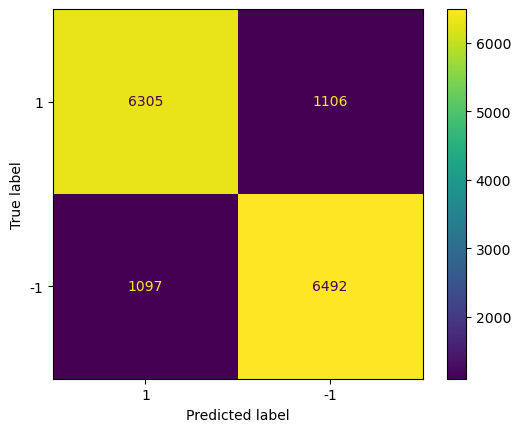

In [27]:
# confusion matrix

from sklearn.metrics._plot.confusion_matrix  import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred)
cm=['1','-1']   
cmd=ConfusionMatrixDisplay(result,display_labels=cm)
cmd.plot()

In [28]:
norm_train_reviews=a.review[:4000]

<function matplotlib.pyplot.show(close=None, block=None)>

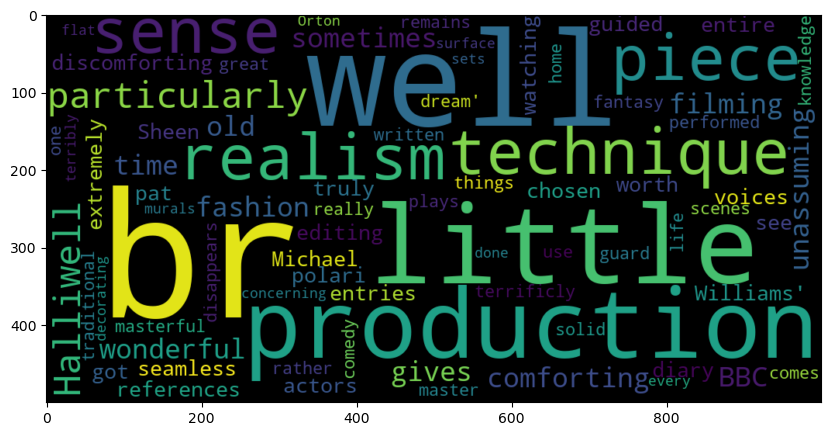

In [29]:
#word cloud for positive review words

from wordcloud import WordCloud
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

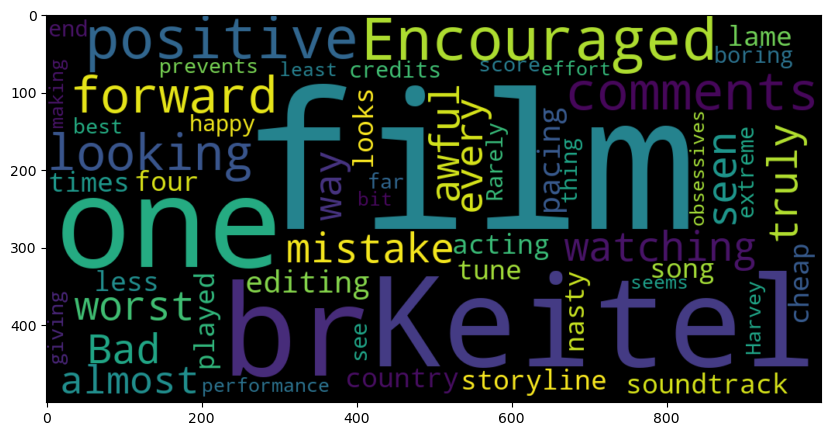

In [30]:
#Word cloud for negative review words

plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show